In [1]:
#Importing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1
664,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q,0
665,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1
666,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,0


In [5]:
#Training Train Data

In [6]:
train.isnull().head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,False


<AxesSubplot:>

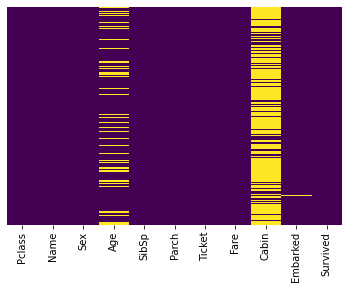

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

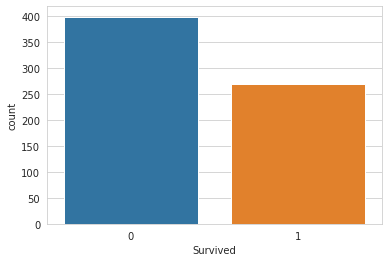

In [9]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

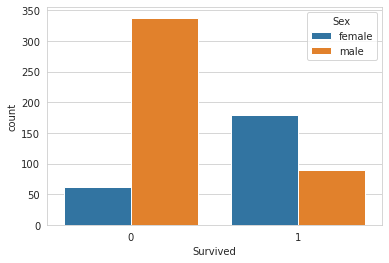

In [10]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

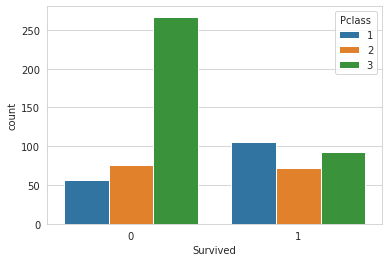

In [11]:
sns.countplot(x='Survived',data=train,hue='Pclass')

In [12]:
train.groupby('Pclass').mean()['Age'].round()

Pclass
1    37.0
2    30.0
3    26.0
Name: Age, dtype: float64

In [13]:
mean_class1 = train.groupby('Pclass').mean()['Age'].round()[1]
mean_class2 = train.groupby('Pclass').mean()['Age'].round()[2]
mean_class3 = train.groupby('Pclass').mean()['Age'].round()[3]
mean_class1

37.0

In [14]:
train.loc[train['Pclass']==1,'Age'] = train.loc[train['Pclass']==1,'Age'].fillna(mean_class1)
train.loc[train['Pclass']==2,'Age'] = train.loc[train['Pclass']==2,'Age'].fillna(mean_class2)
train.loc[train['Pclass']==3,'Age'] = train.loc[train['Pclass']==3,'Age'].fillna(mean_class3)

<AxesSubplot:>

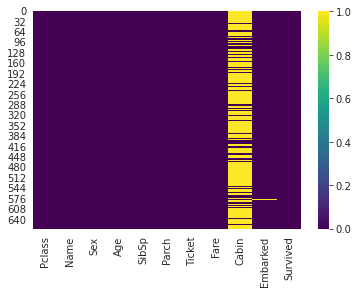

In [15]:
sns.heatmap(train.isnull(), cmap='viridis')

In [16]:
train.drop('Cabin',axis=1,inplace=True)
train.shape

(668, 10)

In [17]:
train.dropna(inplace=True) # dropping the 1 missing value in Embarked column
train.shape

(667, 10)

In [18]:
#ADDING DUMMY VARIABLES

In [19]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train, sex,embark],axis=1)
train.head(5)

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,2,29.0,1,0,26.000,1,0,0,1
1,3,26.0,0,0,8.050,0,1,0,1
2,2,39.0,0,0,26.000,0,1,0,1
3,3,29.0,0,4,21.075,0,0,0,1
4,3,25.0,0,0,7.050,0,1,0,1


In [20]:
YT = train['Survived']
XT = train.drop('Survived',axis=1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(XT, YT, test_size=0.3, random_state=1)
i=0
for i in range(len(y_train)):
    print(y_train.iloc[i])


0
1
0
0
0
0
1
1
1
1
0
0
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0
0
0
0
1
0
0
1
1
0
1
1
0
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
1
1
1
1
1
1
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0
1
0
0
1
1
0
1
0
1
0
0
0
1
1
0
0
1
0
1
1
1
0
1
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
1
0
1
0
0
1
0
0
1
0
1
1
0
0
0
0
1
1
0
0
0
0
0
0
1
1
1
1
1
1
0
0
0
1
0
1
0
0
1
1
0
0
1
1
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
1
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
0
1
0
0
0
0
1
0
1
0
1
0
1
0
0
0
1
1
0
1
1
0
1
1
1
1
0
0
0
0
1
0
1
1
1
0
1
1
0
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
1
1
1
0
1
1
0
0
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
1
0
0
0
1
0


In [23]:
def step_gradient(X, Y, learning_rate, m):
    m_slope=np.zeros(len(X[0]))
    for i in range(len(X)):
        x=X[i]
        y=Y.iloc[i]
        for j in range(len(x)):
            m_slope+=(-1/len(X))*(y-(1/(1+math.exp(-sum(m*x)))))*x[j]
    new_m=m-learning_rate*m_slope
    return new_m

def cost(x, y, m):
    cost=0
    for i in range(len(x)):
        cost+=1/len(x)*(math.log(1+(math.exp(sum(m*x[i]))))-y.iloc[i]*sum(m*x[i]))
    print(cost)

def gradient_descent(x, y, learning_rate, iterations):
    m=np.zeros(len(x[0]))
    for i in range(iterations):
        m=step_gradient(x, y, learning_rate, m)
        print("iteration = ", i, "|| Error/Cost =", end=' ')
        cost(x, y, m)
    return m

def logistic_regression(x, y):
    iterations=300
    learning_rate=0.01
    m=gradient_descent(x, y, learning_rate, iterations)
    return m

In [24]:
from sklearn import preprocessing
import math
scaler=preprocessing.StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
m=logistic_regression(x_train, y_train)
m

iteration =  0 || Error/Cost = 0.6914316337927523
iteration =  1 || Error/Cost = 0.6897667192391713
iteration =  2 || Error/Cost = 0.6881509222357174
iteration =  3 || Error/Cost = 0.6865827589756717
iteration =  4 || Error/Cost = 0.685060777619297
iteration =  5 || Error/Cost = 0.6835835592089217
iteration =  6 || Error/Cost = 0.6821497183989518
iteration =  7 || Error/Cost = 0.6807579040116525
iteration =  8 || Error/Cost = 0.6794067994302261
iteration =  9 || Error/Cost = 0.6780951228409747
iteration =  10 || Error/Cost = 0.6768216273365908
iteration =  11 || Error/Cost = 0.6755851008925654
iteration =  12 || Error/Cost = 0.6743843662285354
iteration =  13 || Error/Cost = 0.6732182805661278
iteration =  14 || Error/Cost = 0.6720857352944172
iteration =  15 || Error/Cost = 0.6709856555536896
iteration =  16 || Error/Cost = 0.6699169997476114
iteration =  17 || Error/Cost = 0.6688787589933453
iteration =  18 || Error/Cost = 0.6678699565185244
iteration =  19 || Error/Cost = 0.66688964

iteration =  166 || Error/Cost = 0.6291656896187519
iteration =  167 || Error/Cost = 0.6291275681623661
iteration =  168 || Error/Cost = 0.6290901295227055
iteration =  169 || Error/Cost = 0.629053360499623
iteration =  170 || Error/Cost = 0.6290172481741473
iteration =  171 || Error/Cost = 0.62898177990177
iteration =  172 || Error/Cost = 0.6289469433059255
iteration =  173 || Error/Cost = 0.6289127262716379
iteration =  174 || Error/Cost = 0.6288791169393403
iteration =  175 || Error/Cost = 0.6288461036988641
iteration =  176 || Error/Cost = 0.6288136751835738
iteration =  177 || Error/Cost = 0.6287818202646727
iteration =  178 || Error/Cost = 0.628750528045645
iteration =  179 || Error/Cost = 0.6287197878568567
iteration =  180 || Error/Cost = 0.6286895892502841
iteration =  181 || Error/Cost = 0.6286599219943962
iteration =  182 || Error/Cost = 0.6286307760691467
iteration =  183 || Error/Cost = 0.6286021416611254
iteration =  184 || Error/Cost = 0.6285740091588076
iteration =  185

array([-0.33551964, -0.33551964, -0.33551964, -0.33551964, -0.33551964,
       -0.33551964, -0.33551964, -0.33551964])

In [25]:
testing=x_test
testing=scaler.transform(testing)
pred=[]
for i in testing:
    if 1/(1+math.exp(-sum(m*i)))>0.5:
        pred.append(1)
    else:
        pred.append(0)

In [26]:
total=0
correct=0
for i, j in zip(pred, y_test):
    total+=1
    if i==j:
        correct+=1
print('score=', (correct/total)*100)
# 67.16417910447761

score= 65.67164179104478


In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [28]:
predictions = logmodel.predict(x_test)
total=0
correct=0
for i, j in zip(predictions, y_test):
    total+=1
    if i==j:
        correct+=1
print('score=', (correct/total)*100)
# 57.2139303482587

score= 58.70646766169154
